In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations


In [3]:
df_overlapping_train = pd.DataFrame(columns=['col1','col2','className'])
df_overlapping_test = pd.DataFrame(columns=['col1','col2','className'])
for i in range(1,5):
    # C:\IML-Assignment1\1_Data\1_Data\group2\classification\nonLinearlySeparable
    with open('C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\overlapping\\class'+ str(i) + '_train.txt') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_overlapping_train.loc[len(df_overlapping_train)] = row 
for i in range(1,5):
    with open('C:\\IML-Assignment1\\1_Data\\1_Data\\group2\\classification\\overlapping\\class'+ str(i) + '_test.txt') as file:
        data = file.readlines()
        for line in data:
            row = line.split()
            row.append(i)
            df_overlapping_test.loc[len(df_overlapping_test)] = row 
df_overlapping_train['col1'] = df_overlapping_train['col1'].astype(float)
df_overlapping_train['col2'] = df_overlapping_train['col2'].astype(float)
df_overlapping_train['className'] = df_overlapping_train['className'].astype(int)

df_overlapping_test['col1'] = df_overlapping_test['col1'].astype(float)
df_overlapping_test['col2'] = df_overlapping_test['col2'].astype(float)
df_overlapping_test['className'] = df_overlapping_test['className'].astype(int)


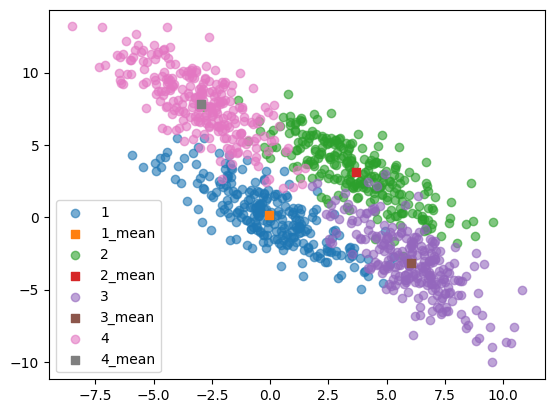

In [4]:
def data_plot(df):
    groups = df.groupby('className')

    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.6)
        mean_label = str(name) + '_mean'
        plt.scatter(x = group.col1.mean(), y = group.col2.mean(), marker='s', label = mean_label, alpha=1)
    plt.legend()
    plt.show()
data_plot(df_overlapping_train)

In [5]:
nn_classifier = KNeighborsClassifier(n_neighbors = 1)

X = df_overlapping_train.iloc[:,:-1]
y = df_overlapping_train.iloc[:, -1]

nn_classifier.fit(X, y)
y_pred = nn_classifier.predict(df_overlapping_test.iloc[:,:-1])
#predict the accuracy of the prediction
from sklearn.metrics import accuracy_score
accuracy_score(df_overlapping_test.iloc[:,-1], y_pred)

0.895

In [6]:
#defining the boundaries of the domain
def decision_plot(df, classifier, title = "Traing Data"):   
    min1, max1 = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
    min2, max2 = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1
    print(min1,max1,min2,max2)
    #define all the range
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    yhat = classifier.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contour(xx, yy, zz, colors='k')
    plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.5)
    groups = df.groupby('className')
    for name, group in groups:
        plt.scatter(group.col1, group.col2, marker='o', label=name, alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.show()

-9.5294 11.838 -11.046 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


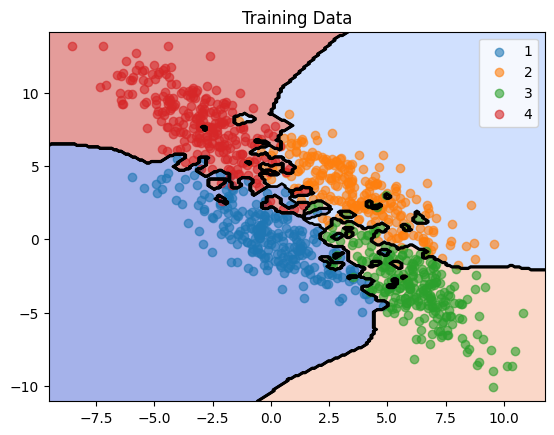

In [7]:
#Decision Plot of all training data imposed
decision_plot(df_overlapping_train, nn_classifier, title = "Training Data")

-6.8578 10.7752 -10.4544 14.418


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


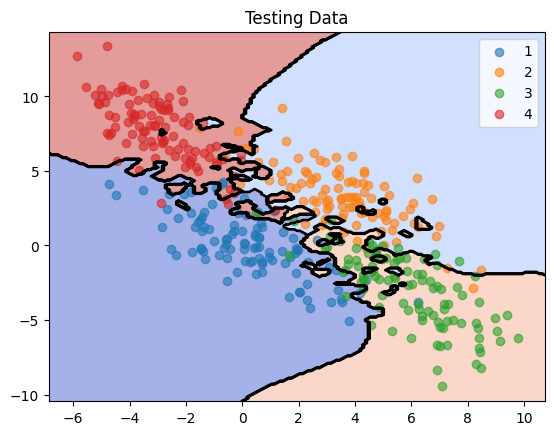

In [8]:
decision_plot(df_overlapping_test, nn_classifier, title = "Testing Data")

Pairwise plot 

-6.9493 10.5935 -5.9731 9.5231


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


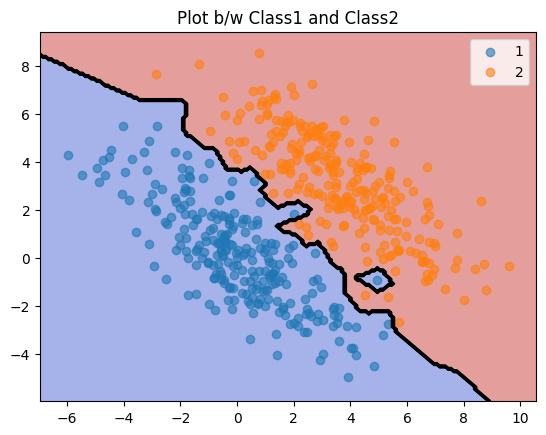

-6.9493 11.838 -11.046 6.4977


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


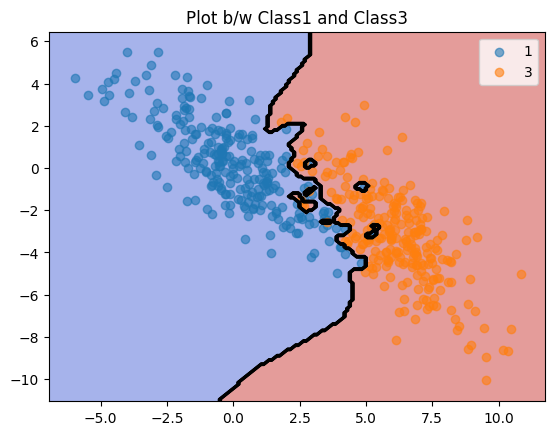

-9.5294 6.3189 -5.9731 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


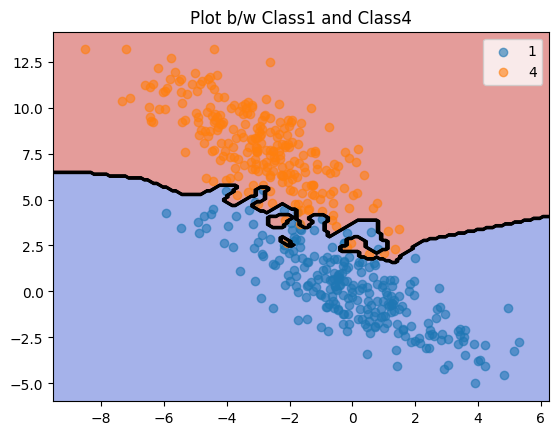

-3.8473 11.838 -11.046 9.5231


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


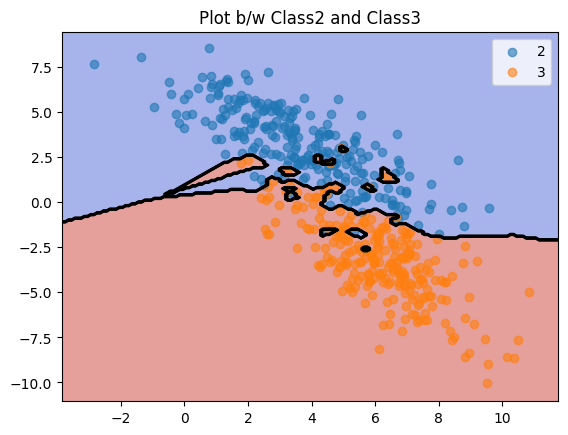

-9.5294 10.5935 -3.6665 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


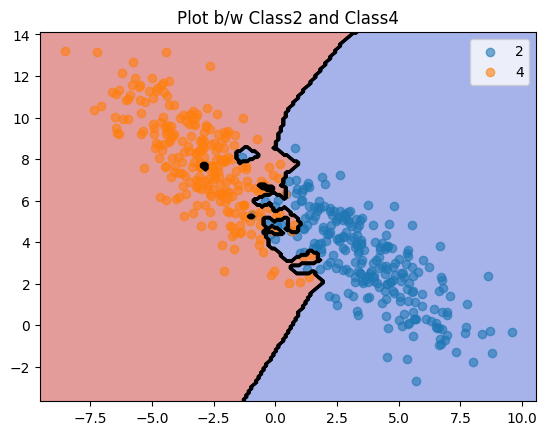

-9.5294 11.838 -11.046 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


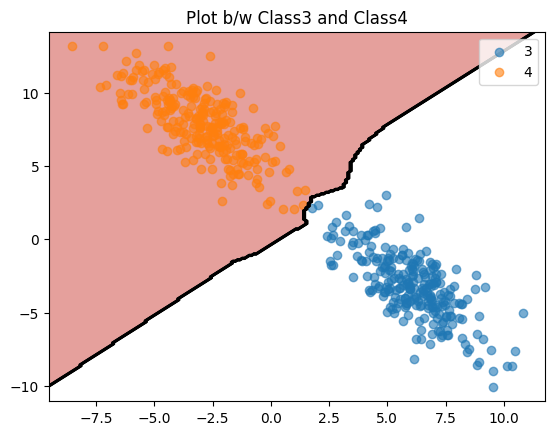

In [27]:
pairs = list(combinations(df_overlapping_train.className.unique(), 2))

for i in pairs:
    dataframe = df_overlapping_train[(df_overlapping_train.className == i[0]) | (df_overlapping_train.className == i[1])]
    pairwise_classifier = KNeighborsClassifier(n_neighbors=1)

    pairwise_classifier.fit(dataframe.iloc[:,:-1],dataframe.iloc[:,-1])
    decision_plot(dataframe, pairwise_classifier, title = f"Plot b/w Class{i[0]} and Class{i[1]}")

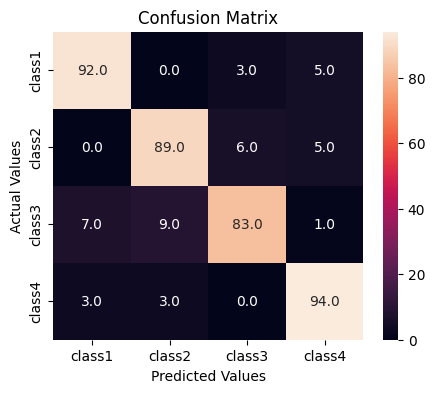

In [9]:
def plot_confusion_matrix(df_test, y_pred):
    cm = confusion_matrix(df_test.iloc[:,-1].values,y_pred)
    cm_df = pd.DataFrame(cm, index = ['class1','class2','class3','class4'],  columns = ['class1','class2','class3','class4'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, fmt='.1f', annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

plot_confusion_matrix(df_overlapping_test, y_pred)

In [10]:
def plot_mean_matrix(df_test, y_pred):
    table_df = pd.DataFrame(index=['Accuracy Score','Mean Precision','Mean Recall','Mean F1'], 
                        columns=['Value'])

    y_true = df_test.iloc[:, -1].values

    accuracy = accuracy_score(y_true, y_pred)
    table_df.loc['Accuracy Score', 'Value'] = accuracy

    mean_precision = precision_score(y_true, y_pred, average='macro')
    table_df.loc['Mean Precision', 'Value'] = mean_precision

    mean_recall = recall_score(y_true, y_pred, average='macro')
    table_df.loc['Mean Recall', 'Value'] = mean_recall

    mean_f1 = f1_score(y_true, y_pred, average='macro')
    table_df.loc['Mean F1', 'Value'] = mean_f1
    
    table_df['Index'] = table_df.index
    table_df = table_df[['Index','Value']]
    fig, ax = plt.subplots(figsize=(4, 3))
    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center',colLoc='center',rowLoc='center',)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5) 
    
    ax.axis('off') 
    plt.title('Summary', fontsize=14)
    plt.show()

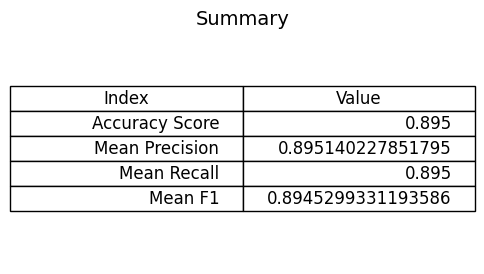

In [11]:
plot_mean_matrix(df_overlapping_test, y_pred)

In [12]:
def plot_metric_summary(df_test, y_pred):
    table_df = pd.DataFrame(columns=['Class1','Class2','Class3','Class4'], 
                        index=['Precision','Recall', 'F1 Score'])
    y_true = df_test.iloc[:, -1].values

    precision_per_class = precision_score(y_true, y_pred, average=None)
    for i, precision in enumerate(precision_per_class):
        table_df.loc['Precision', f'Class{i+1}'] = precision

    recall_per_class = recall_score(y_true, y_pred, average=None)
    for i, recall in enumerate(recall_per_class):
        table_df.loc['Recall', f'Class{i+1}'] = recall

    f1_per_class = f1_score(y_true, y_pred, average=None)
    for i, f1 in enumerate(f1_per_class):
        table_df.loc['F1 Score', f'Class{i+1}'] = f1    
     
    table_df['Index'] = table_df.index
    table_df = table_df[['Index','Class1','Class2','Class3','Class4']]
    fig, ax = plt.subplots(figsize=(4, 3))
    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center',colLoc='center',rowLoc='center',)
    table.auto_set_font_size(False)
    table.set_fontsize(7)
    table.scale(2, 2) 
    
    ax.axis('off') 
    plt.title('Summary', fontsize=14)
    plt.show()

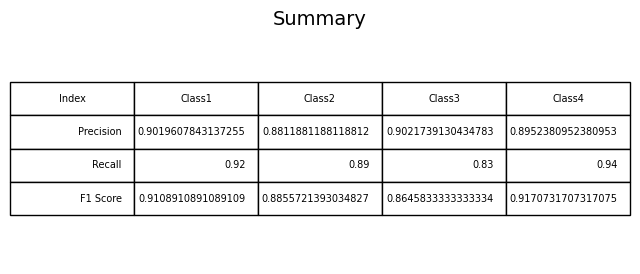

In [13]:
plot_metric_summary(df_overlapping_test, y_pred)

# KNN

Optimal k value (based on error rate): 16


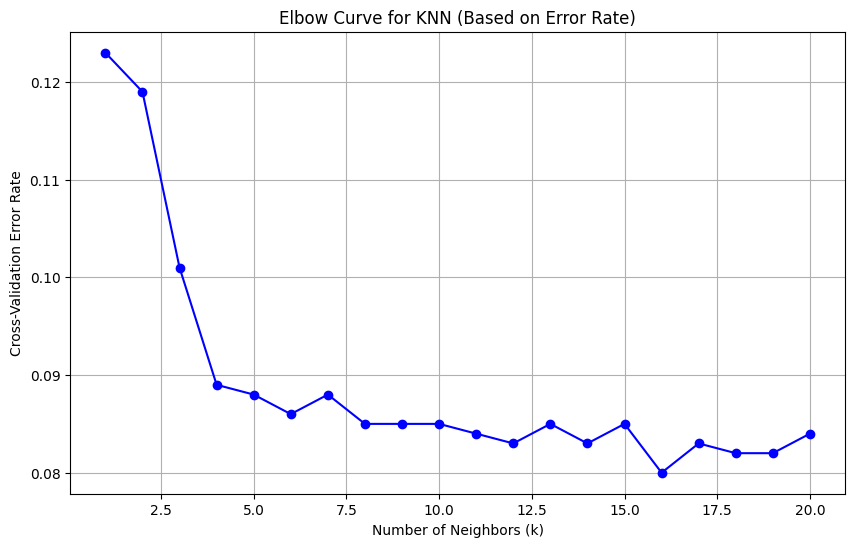

In [14]:
X = df_overlapping_train.iloc[:,:-1]
y = df_overlapping_train.iloc[:,-1]

k_values = range(1, 21)  

# Initialize lists to store cross-validation error rates
cv_errors = []

# Calculate cross-validation error rates for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # Use accuracy as the scoring metric
    cv_errors.append(1 - scores.mean())  # Convert accuracy to error rate

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_errors, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KNN (Based on Error Rate)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Error Rate')
plt.grid(True)

# Find the optimal k value (the one with the lowest error rate)
optimal_k = k_values[np.argmin(cv_errors)]
print(f'Optimal k value (based on error rate): {optimal_k}')

plt.show()


In [21]:
#testing based on k = 6 and k = 7 and k = 16

classifier16 = KNeighborsClassifier(n_neighbors=16)
classifier16.fit(X,y)
y_pred = classifier16.predict(df_overlapping_test.iloc[:,:-1])

-9.5294 11.838 -11.046 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


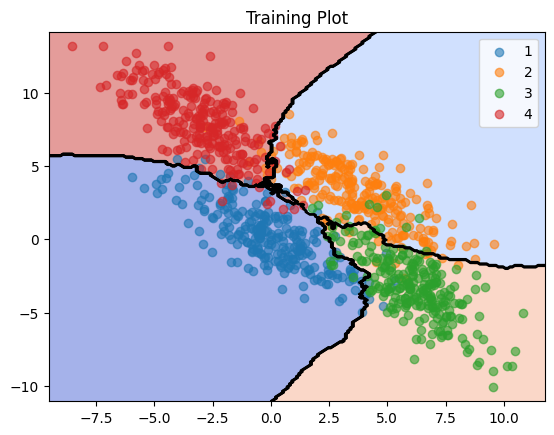

In [22]:
decision_plot(df_overlapping_train,classifier16, title = "Training Plot" )

-6.8578 10.7752 -10.4544 14.418


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


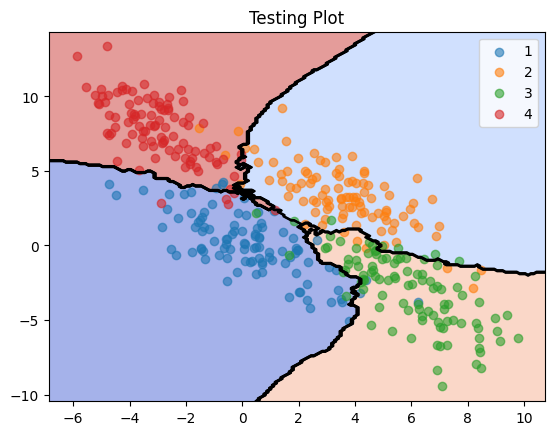

In [23]:
decision_plot(df_overlapping_test,classifier16, title = "Testing Plot" )

Pairwise plot

-6.9493 10.5935 -5.9731 9.5231


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


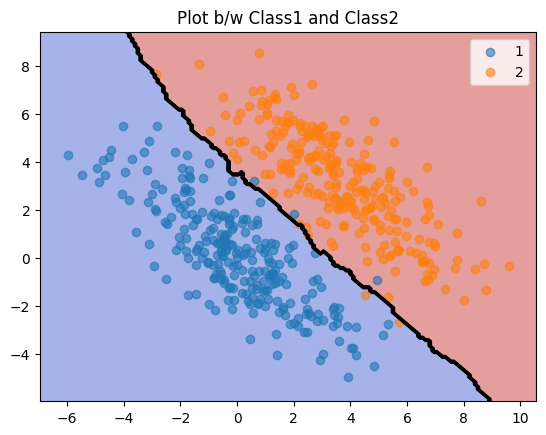

-6.9493 11.838 -11.046 6.4977


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


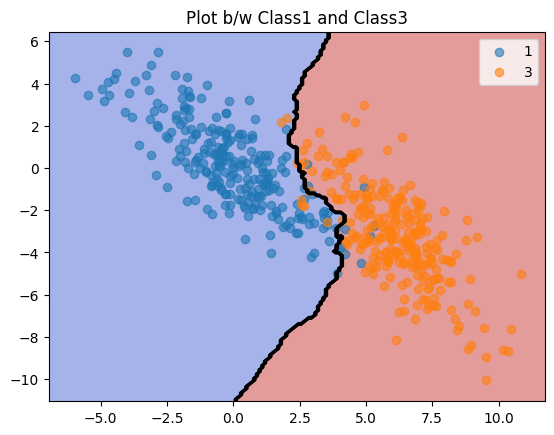

-9.5294 6.3189 -5.9731 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


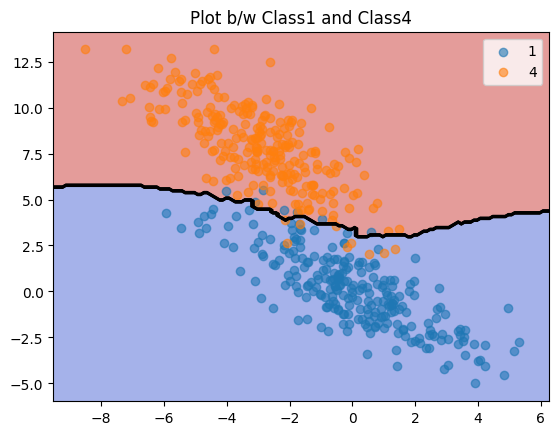

-3.8473 11.838 -11.046 9.5231


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


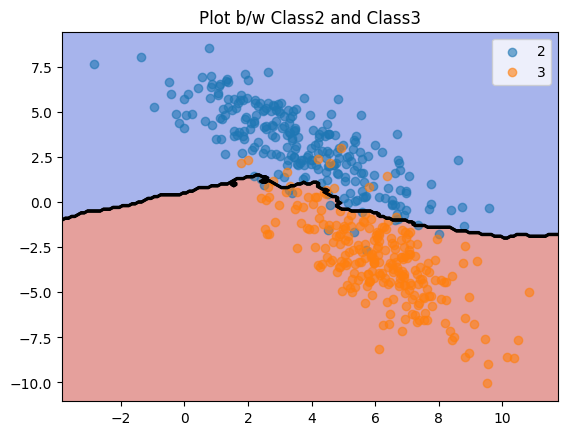

-9.5294 10.5935 -3.6665 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


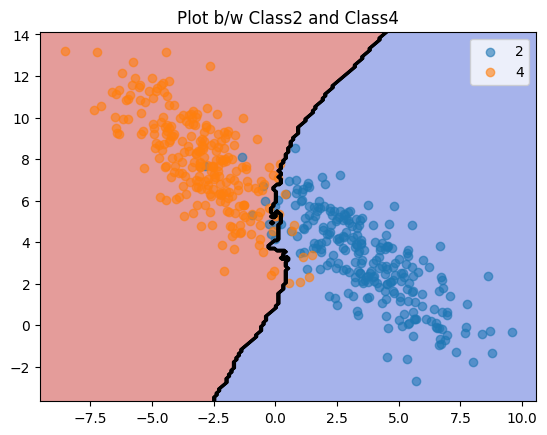

-9.5294 11.838 -11.046 14.194


c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


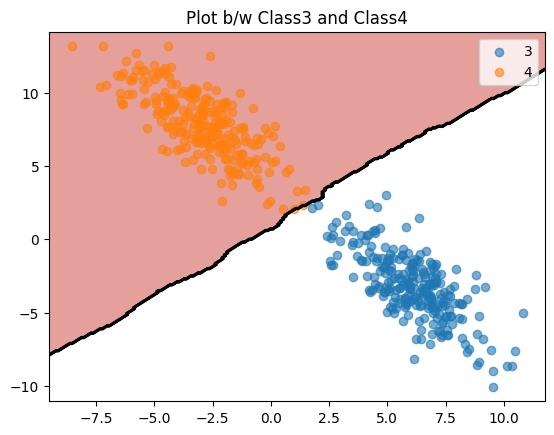

In [28]:
pairs = list(combinations(df_overlapping_train.className.unique(), 2))

for i in pairs:
    dataframe = df_overlapping_train[(df_overlapping_train.className == i[0]) | (df_overlapping_train.className == i[1])]
    pairwise_classifier = KNeighborsClassifier(n_neighbors=16)

    pairwise_classifier.fit(dataframe.iloc[:,:-1], dataframe.iloc[:,-1])
    decision_plot(dataframe, pairwise_classifier, title = f"Plot b/w Class{i[0]} and Class{i[1]}")

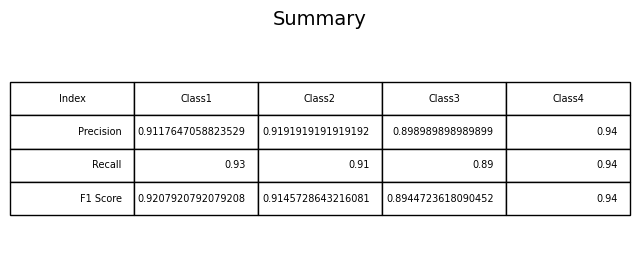

In [29]:
plot_metric_summary(df_overlapping_test, y_pred)

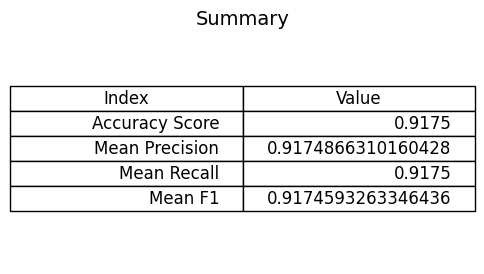

In [30]:
plot_mean_matrix(df_overlapping_test, y_pred)

# Reference based Classifier

In [31]:
class ReferenceTemplateClassifier():
    def __init__(self):
        self.mean = []
    
    def fit(self, df):
        groups = df.groupby('className')
        for name, group in groups:
            mean_value = (group['col1'].mean(), group['col2'].mean(), name)
            self.mean.append(mean_value)
        return self.mean

    def predict(self, data_array):
        y_pred = []
        for row in data_array:
            min_distance = float('inf')
            assigned_class = None

            for mean_tuple in self.mean:
                distance = np.sqrt((row[0] - mean_tuple[0])**2 + (row[1] - mean_tuple[1])**2)
                if distance < min_distance:
                    min_distance = distance
                    assigned_class = mean_tuple[2]
            y_pred.append(assigned_class)
        return np.array(y_pred)
    

In [33]:
referenceTemplateClassifier = ReferenceTemplateClassifier()
referenceTemplateClassifier.fit(df_overlapping_train)
test_data = df_overlapping_test[['col1','col2']].to_numpy()
y_pred = referenceTemplateClassifier.predict(test_data)

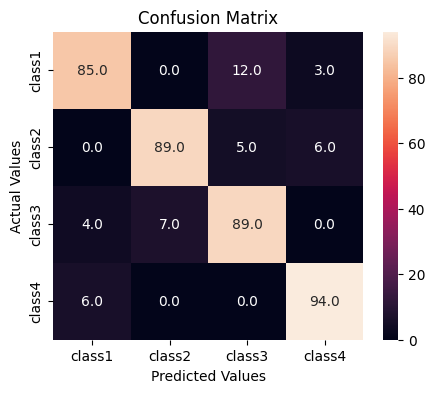

In [36]:
plot_confusion_matrix(df_overlapping_test, y_pred)


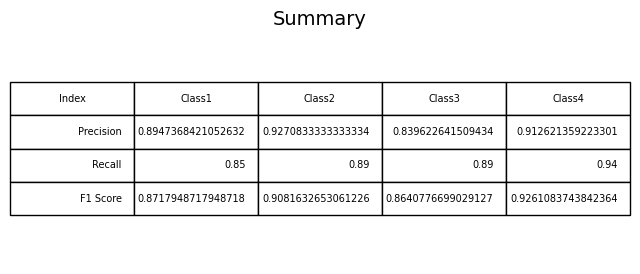

In [39]:
plot_metric_summary(df_overlapping_test, y_pred)

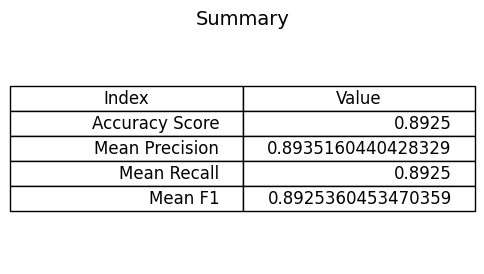

In [40]:
plot_mean_matrix(df_overlapping_test, y_pred)